In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [12]:
x1=pd.read_csv("house_data.csv")
x2=pd.read_csv("house_test.csv")

In [13]:
x1["indent"] = "train"
x2["indent"] = "test"

In [14]:
x2['SalePrice'] = None

In [15]:
x1.shape

(1460, 82)

In [16]:
x2.shape

(1459, 82)

In [17]:
df = pd.concat([x1,x2])

In [18]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,indent
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,None,test
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,None,test
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,None,test
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,None,test


In [19]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
...,...
YrSold,0
SaleType,1
SaleCondition,0
SalePrice,1459


In [20]:
df.nunique()

,0
Id,2919
MSSubClass,16
MSZoning,5
LotFrontage,128
LotArea,1951
...,...
YrSold,5
SaleType,9
SaleCondition,6
SalePrice,663


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
#d =[]
#for i in df:
#    if df[i].isnull().sum()>0:
#        d.append(i)
#d

In [23]:
for i in df:
    if df[i].isnull().sum()>0:
        print(i,"-----------",df[i].isnull().sum())

MSZoning ----------- 4
LotFrontage ----------- 486
Alley ----------- 2721
Utilities ----------- 2
Exterior1st ----------- 1
Exterior2nd ----------- 1
MasVnrType ----------- 1766
MasVnrArea ----------- 23
BsmtQual ----------- 81
BsmtCond ----------- 82
BsmtExposure ----------- 82
BsmtFinType1 ----------- 79
BsmtFinSF1 ----------- 1
BsmtFinType2 ----------- 80
BsmtFinSF2 ----------- 1
BsmtUnfSF ----------- 1
TotalBsmtSF ----------- 1
Electrical ----------- 1
BsmtFullBath ----------- 2
BsmtHalfBath ----------- 2
KitchenQual ----------- 1
Functional ----------- 2
FireplaceQu ----------- 1420
GarageType ----------- 157
GarageYrBlt ----------- 159
GarageFinish ----------- 159
GarageCars ----------- 1
GarageArea ----------- 1
GarageQual ----------- 159
GarageCond ----------- 159
PoolQC ----------- 2909
Fence ----------- 2348
MiscFeature ----------- 2814
SaleType ----------- 1
SalePrice ----------- 1459


In [24]:
for i in df:
    if df[i].isnull().sum()>0 and df[i].isnull().sum()<=10:
        print(i,df[i].isnull().sum())

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageCars 1
GarageArea 1
SaleType 1


In [25]:
for i in df:
    if df[i].isnull().sum()>0 and df[i].isnull().sum()<=10:
        df[i].ffill(inplace =True)

In [26]:
df["PoolArea"].value_counts(dropna = False)

,count
PoolArea,
0,2906
512,1
648,1
576,1
555,1
480,1
519,1
738,1
144,1


In [27]:
df["PoolQC"].value_counts(dropna = False)

,count
PoolQC,
NaN,2909
Ex,4
Gd,4
Fa,2


In [28]:
df["Fence"].value_counts(dropna = False)

,count
Fence,
NaN,2348
MnPrv,329
GdPrv,118
GdWo,112
MnWw,12


In [29]:
df["MiscFeature"].value_counts(dropna = False)

,count
MiscFeature,
NaN,2814
Shed,95
Gar2,5
Othr,4
TenC,1


In [30]:
df["Alley"].value_counts(dropna = False)

,count
Alley,
NaN,2721
Grvl,120
Pave,78


In [31]:
# remove columns:  ID, PoolArea, PoolQC, Fence, MiscFeature

In [32]:
df.drop(columns=["Id","PoolArea","PoolQC","Fence","MiscFeature"],
        inplace = True)

In [33]:
for i in df:
    if df[i].isnull().sum()>0:
        print(i,"-----------",df[i].isnull().sum())

LotFrontage ----------- 486
Alley ----------- 2721
MasVnrType ----------- 1766
MasVnrArea ----------- 23
BsmtQual ----------- 81
BsmtCond ----------- 82
BsmtExposure ----------- 82
BsmtFinType1 ----------- 79
BsmtFinType2 ----------- 80
FireplaceQu ----------- 1420
GarageType ----------- 157
GarageYrBlt ----------- 159
GarageFinish ----------- 159
GarageQual ----------- 159
GarageCond ----------- 159
SalePrice ----------- 1459


In [34]:
cols = [
    "LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual",
    "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish",
    "GarageQual", "GarageCond"
]

for col in cols:
    df[cols] = df[cols].ffill()


In [35]:
for i in df:
    if df[i].isnull().sum()>0:
        print(i,"-----------",df[i].isnull().sum())

Alley ----------- 21
FireplaceQu ----------- 1
SalePrice ----------- 1459


In [36]:
df["Alley"] = df["Alley"].bfill()
df["FireplaceQu"] = df["FireplaceQu"].bfill()

In [37]:
df["Alley"].value_counts()

,count
Alley,
Grvl,1805
Pave,1114


In [38]:
for i in df:
    if df[i].isnull().sum()>0:
        print(i,"-----------",df[i].isnull().sum())

SalePrice ----------- 1459


In [39]:
df.select_dtypes([int,float]).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold'],
      dtype='object')

In [40]:
def remove_outliers(x,uf,lf):
    x = x.clip(lower = lf)
    x = x.clip(upper = uf)
    return x

In [41]:
def IQR(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    print("LF",lf)
    print("UF",uf)

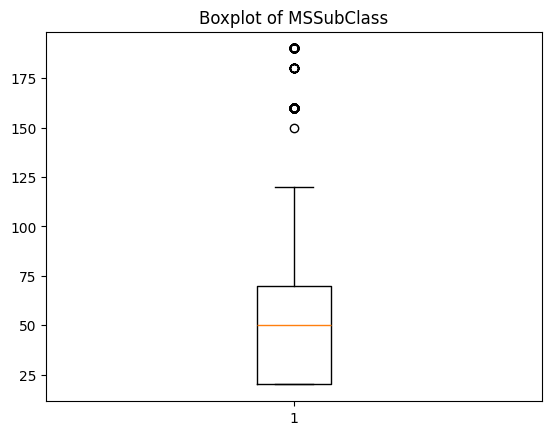

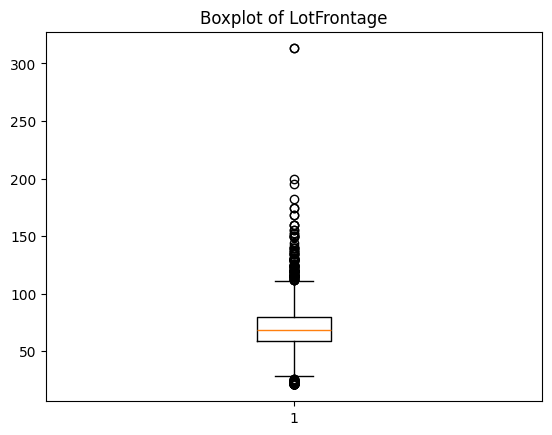

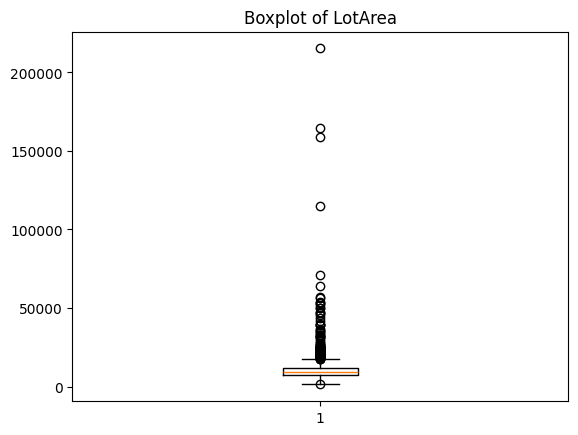

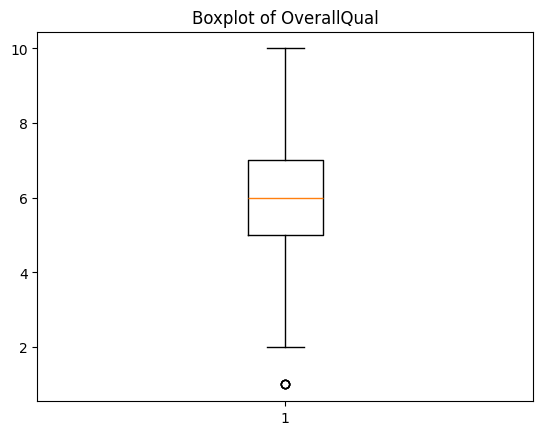

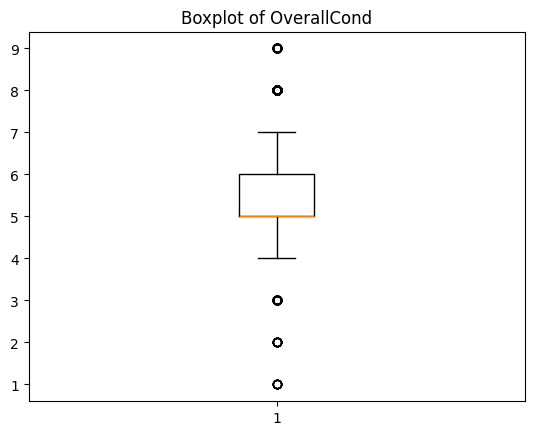

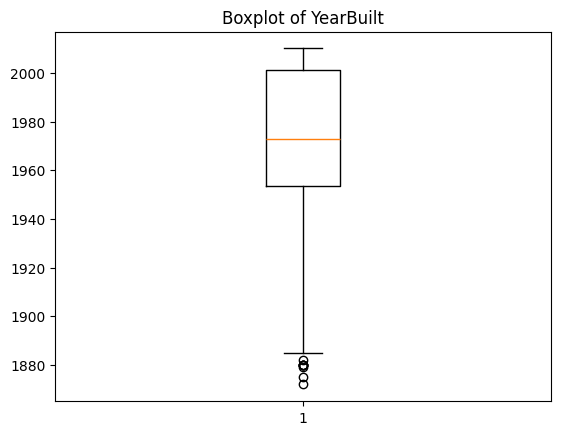

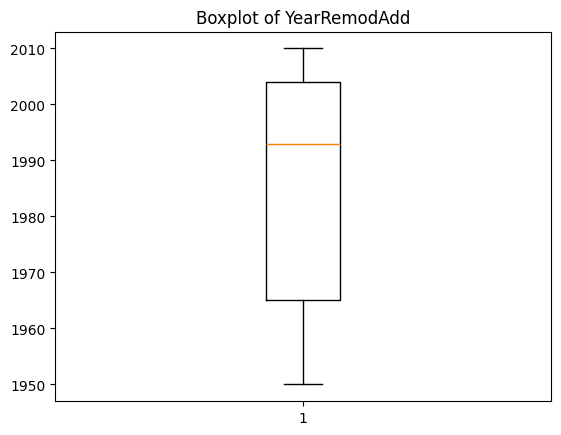

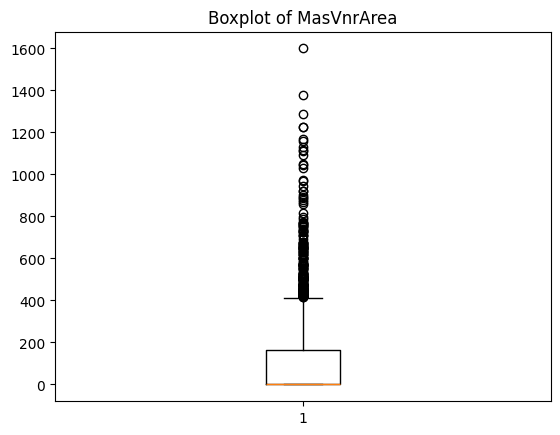

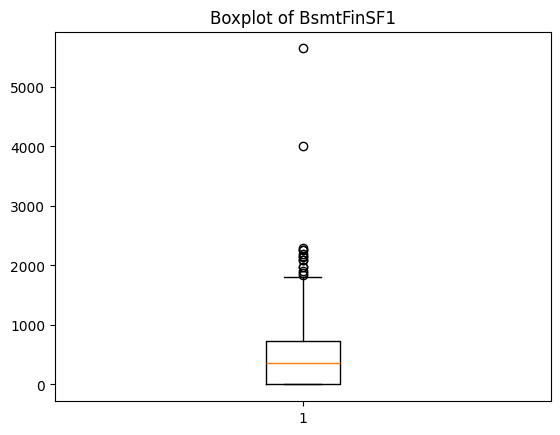

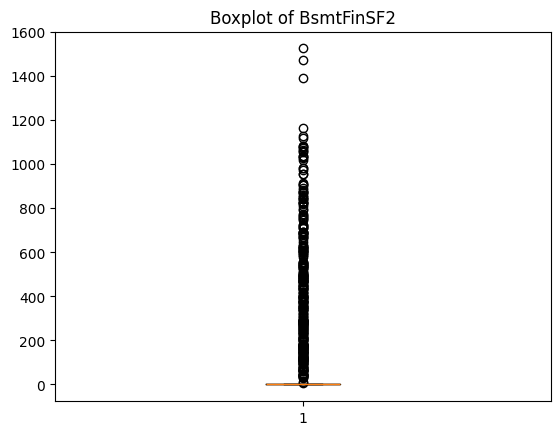

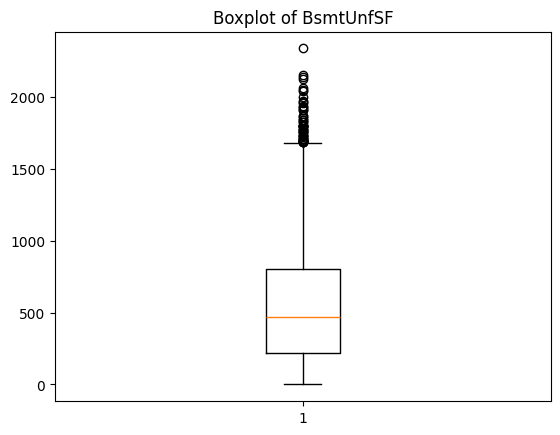

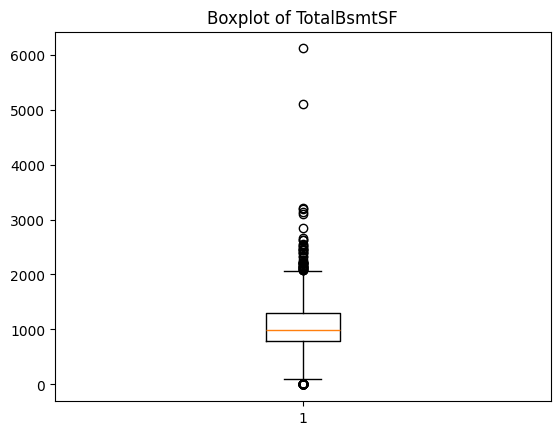

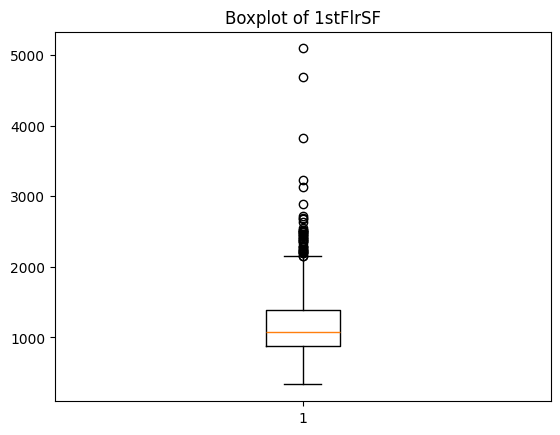

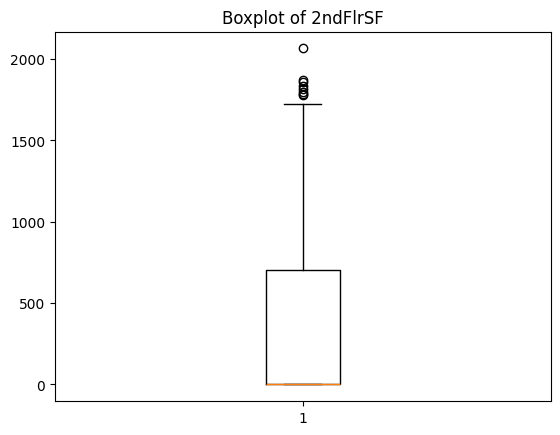

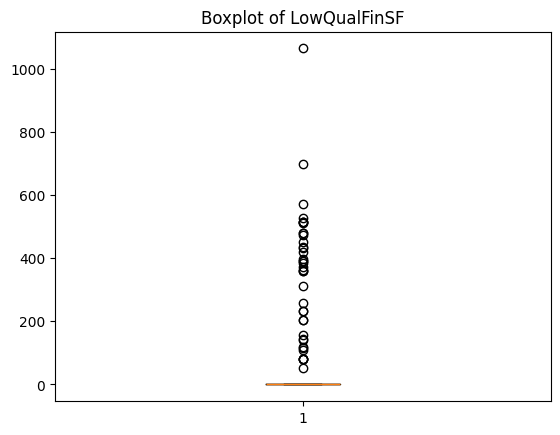

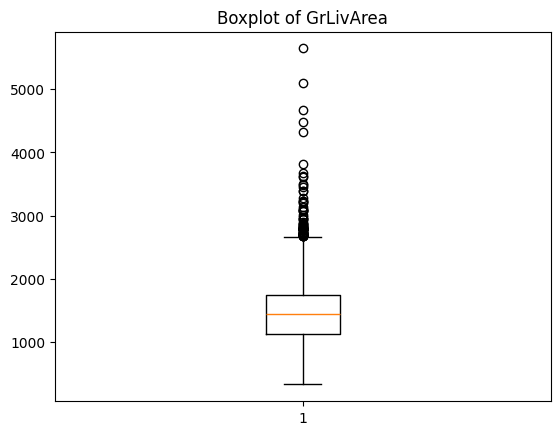

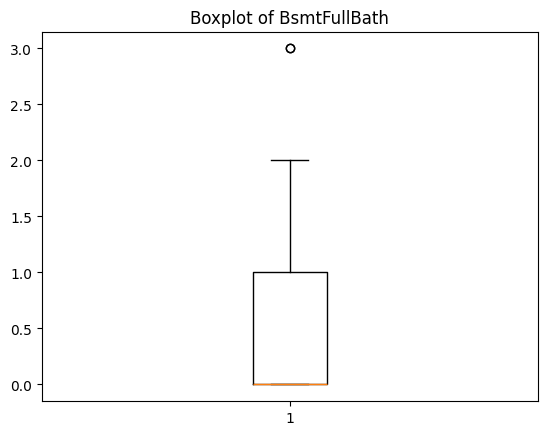

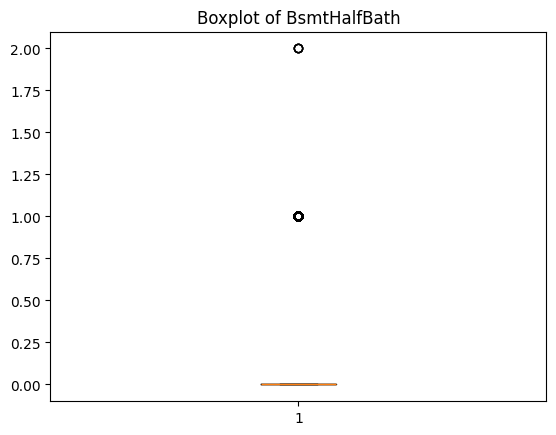

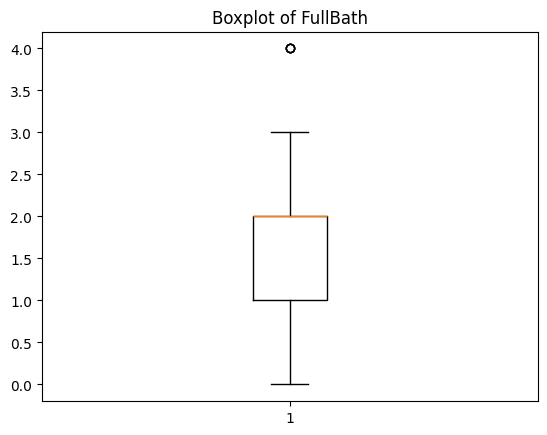

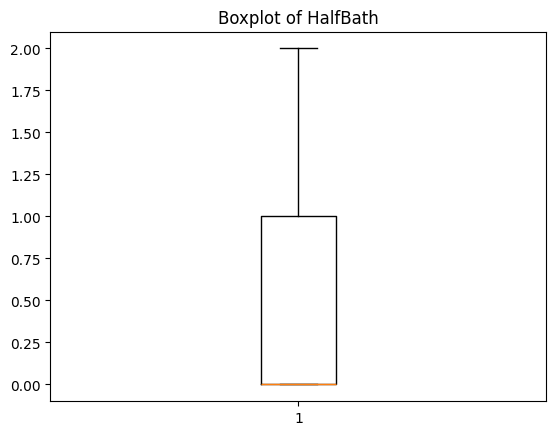

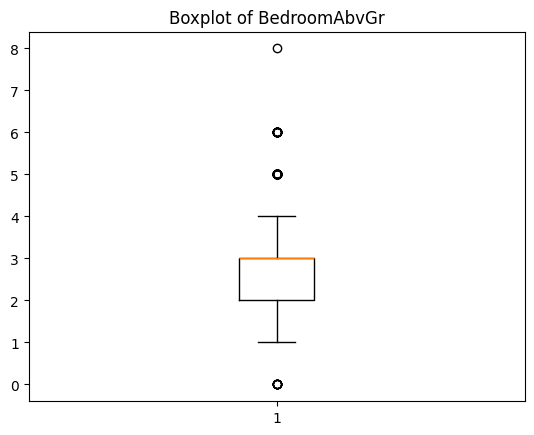

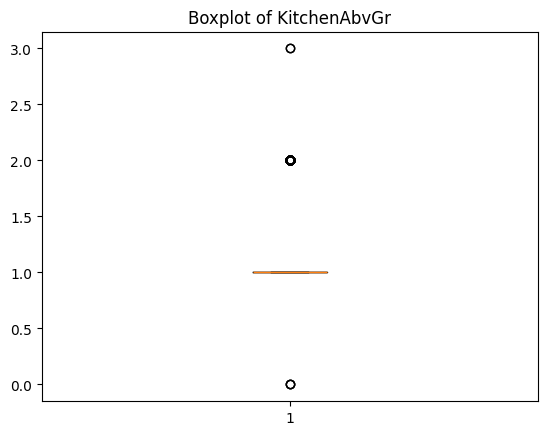

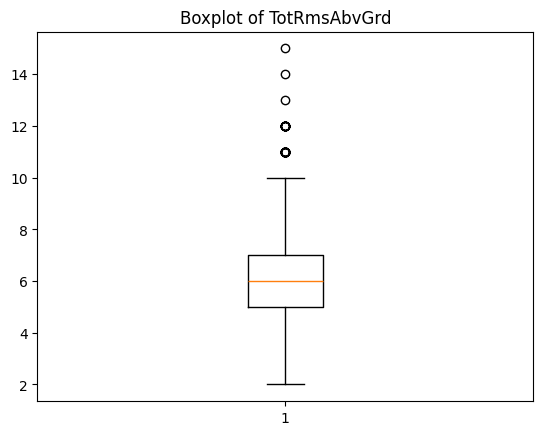

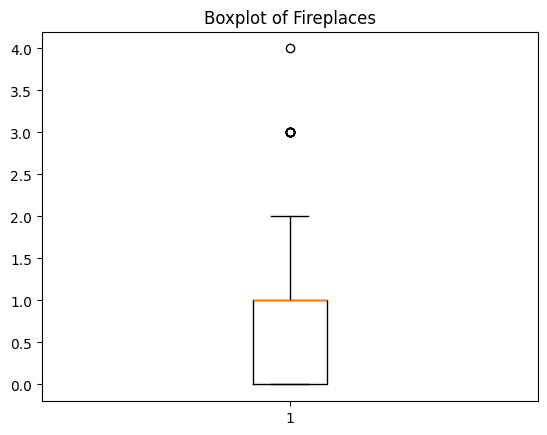

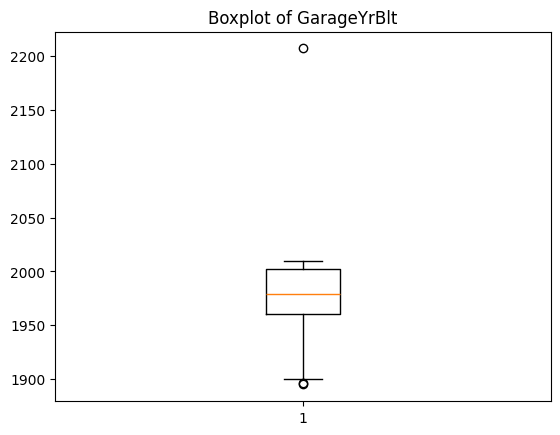

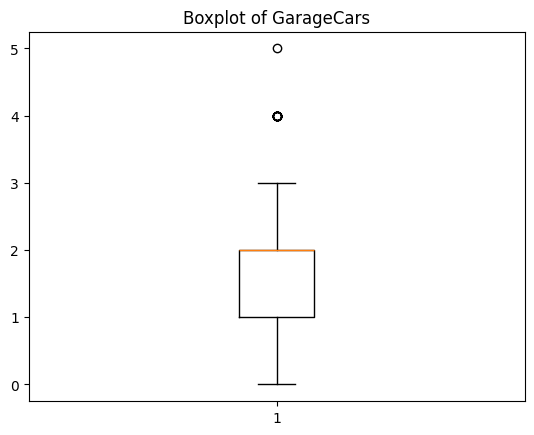

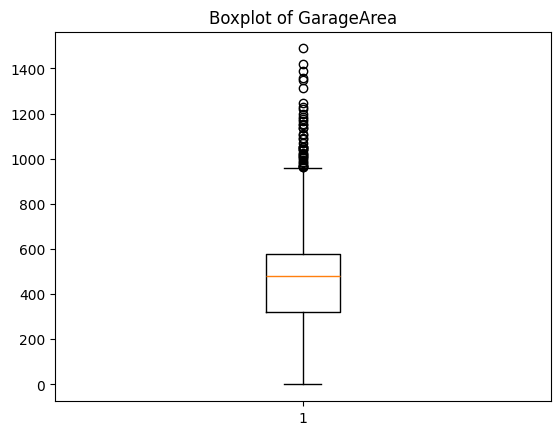

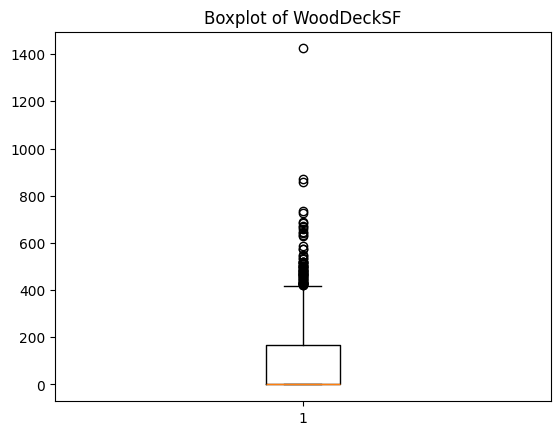

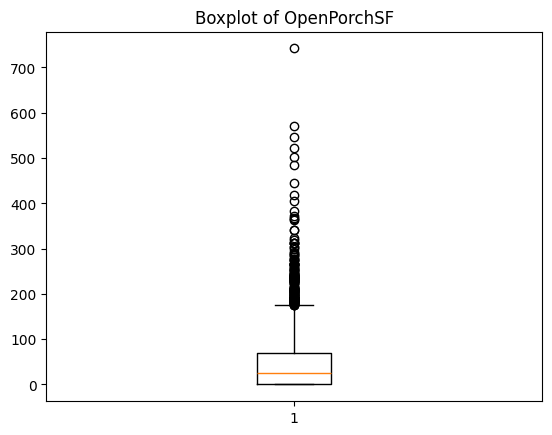

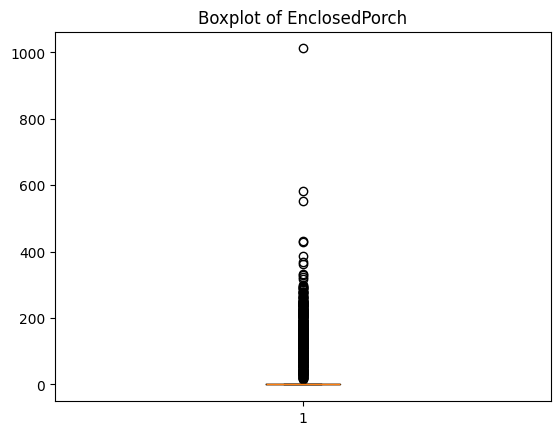

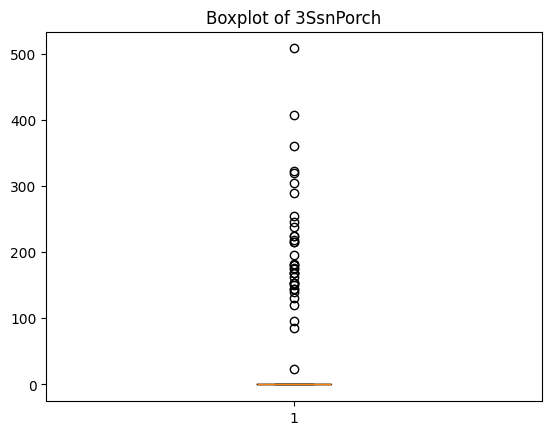

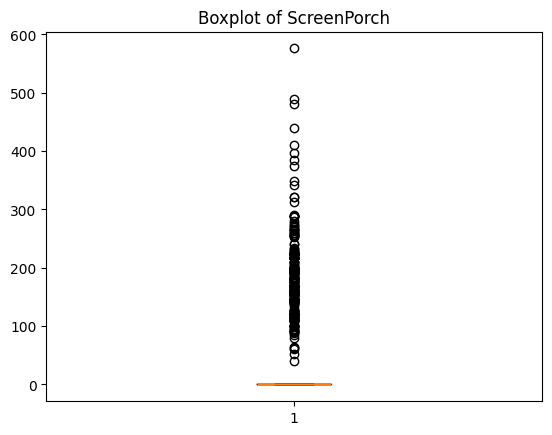

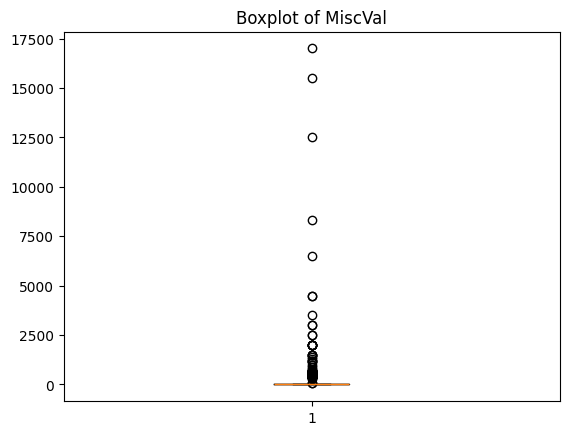

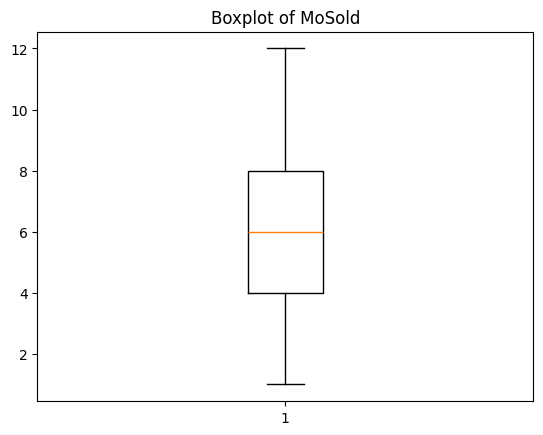

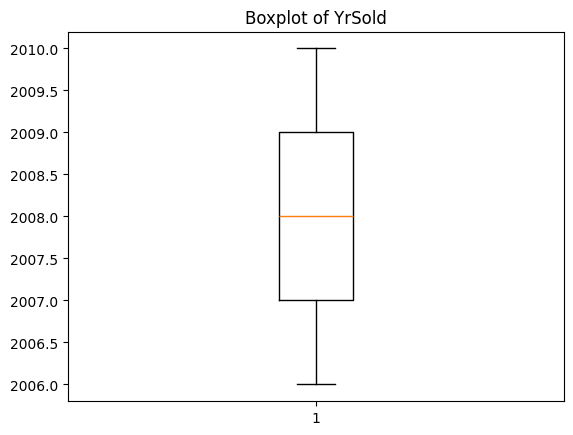

In [42]:
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold']
for col in cols:
    plt.boxplot(df[col])
    plt.title("Boxplot of {}".format(col))
    plt.show()

In [43]:
clms =['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
for col in clms:
    print("Column: {}".format(col))
    IQR(df[col])
    print()


Column: MSSubClass
LF -55.0
UF 145.0

Column: LotFrontage
LF 27.5
UF 111.5

Column: LotArea
LF 1340.0
UF 17708.0

Column: OverallQual
LF 2.0
UF 10.0

Column: OverallCond
LF 3.5
UF 7.5

Column: YearBuilt
LF 1882.25
UF 2072.25

Column: MasVnrArea
LF -248.25
UF 413.75

Column: BsmtFinSF1
LF -1099.5
UF 1832.5

Column: BsmtFinSF2
LF 0.0
UF 0.0

Column: BsmtUnfSF
LF -657.5
UF 1682.5

Column: TotalBsmtSF
LF 29.5
UF 2065.5

Column: 1stFlrSF
LF 108.75
UF 2154.75

Column: 2ndFlrSF
LF -1056.0
UF 1760.0

Column: LowQualFinSF
LF 0.0
UF 0.0

Column: GrLivArea
LF 199.75
UF 2669.75

Column: BsmtFullBath
LF -1.5
UF 2.5

Column: BsmtHalfBath
LF 0.0
UF 0.0

Column: FullBath
LF -0.5
UF 3.5

Column: BedroomAbvGr
LF 0.5
UF 4.5

Column: KitchenAbvGr
LF 1.0
UF 1.0

Column: TotRmsAbvGrd
LF 2.0
UF 10.0

Column: Fireplaces
LF -1.5
UF 2.5

Column: GarageYrBlt
LF 1897.0
UF 2065.0

Column: GarageCars
LF -0.5
UF 3.5

Column: GarageArea
LF -64.0
UF 960.0

Column: WoodDeckSF
LF -252.0
UF 420.0

Column: OpenPorchSF
LF 

In [44]:
for col in clms:
    median = df[col].median()
    print("Column: {}".format(col))
    print("  Median: {}".format(median))
    print()

Column: MSSubClass
  Median: 50.0

Column: LotFrontage
  Median: 68.0

Column: LotArea
  Median: 9453.0

Column: OverallQual
  Median: 6.0

Column: OverallCond
  Median: 5.0

Column: YearBuilt
  Median: 1973.0

Column: MasVnrArea
  Median: 0.0

Column: BsmtFinSF1
  Median: 368.0

Column: BsmtFinSF2
  Median: 0.0

Column: BsmtUnfSF
  Median: 467.0

Column: TotalBsmtSF
  Median: 989.0

Column: 1stFlrSF
  Median: 1082.0

Column: 2ndFlrSF
  Median: 0.0

Column: LowQualFinSF
  Median: 0.0

Column: GrLivArea
  Median: 1444.0

Column: BsmtFullBath
  Median: 0.0

Column: BsmtHalfBath
  Median: 0.0

Column: FullBath
  Median: 2.0

Column: BedroomAbvGr
  Median: 3.0

Column: KitchenAbvGr
  Median: 1.0

Column: TotRmsAbvGrd
  Median: 6.0

Column: Fireplaces
  Median: 1.0

Column: GarageYrBlt
  Median: 1979.0

Column: GarageCars
  Median: 2.0

Column: GarageArea
  Median: 480.0

Column: WoodDeckSF
  Median: 0.0

Column: OpenPorchSF
  Median: 26.0

Column: EnclosedPorch
  Median: 0.0

Column: 3SsnP

In [45]:
for i in df.select_dtypes([int,float]):

    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    if lf>0 or uf>0:
        df[i] = df[i].clip(lf,uf)

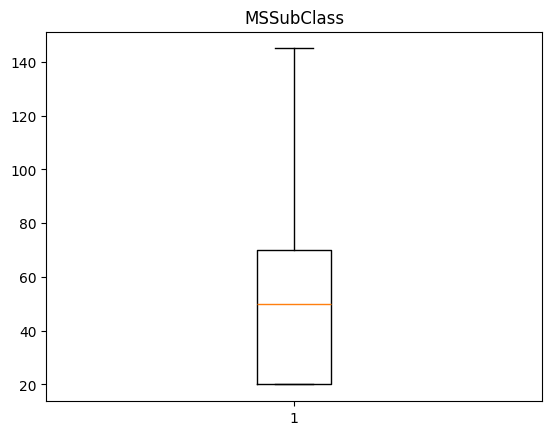

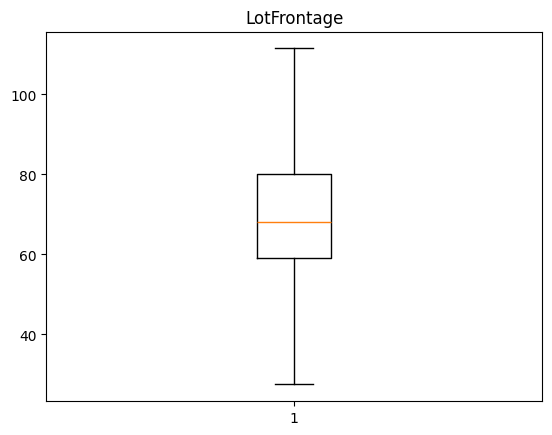

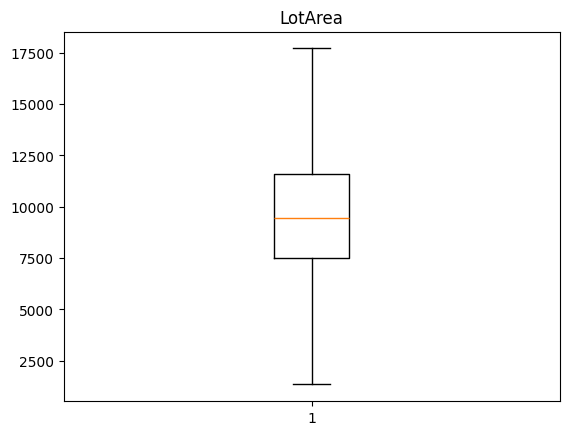

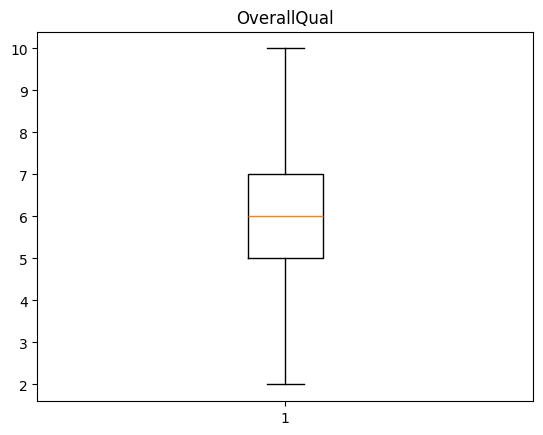

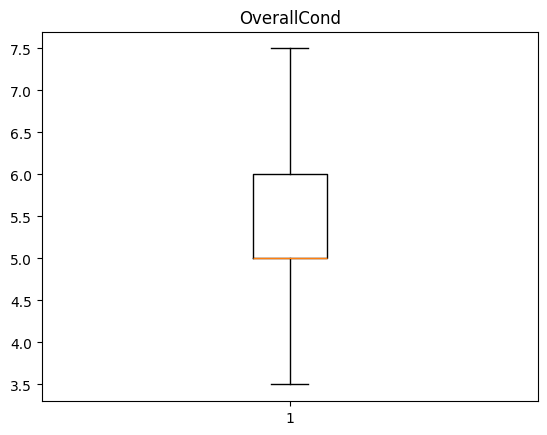

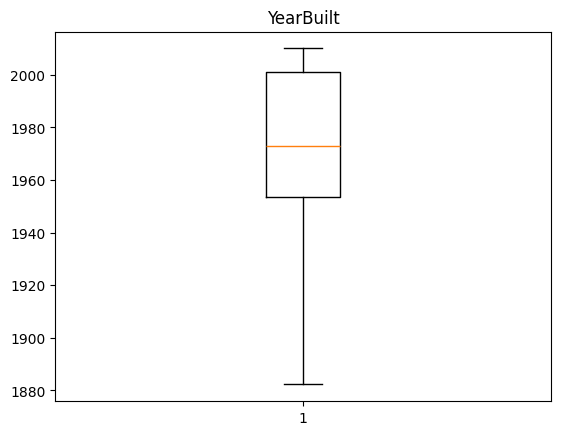

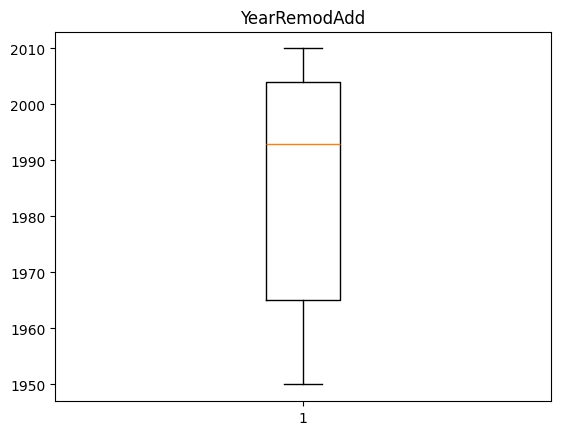

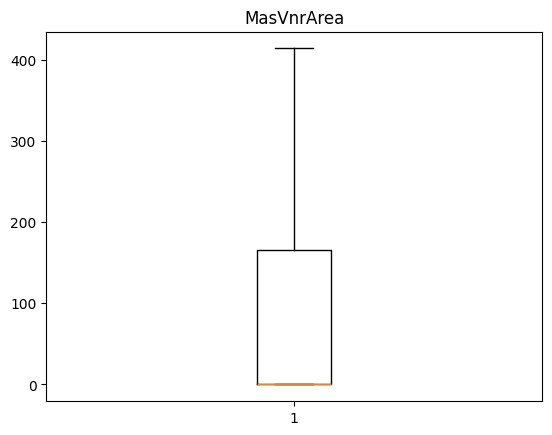

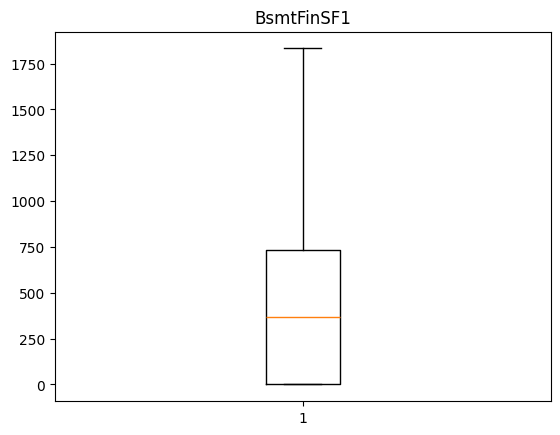

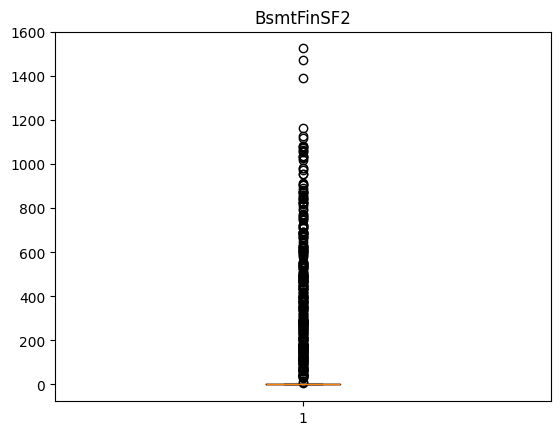

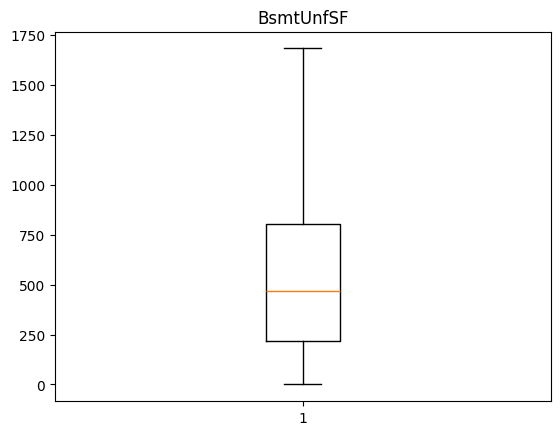

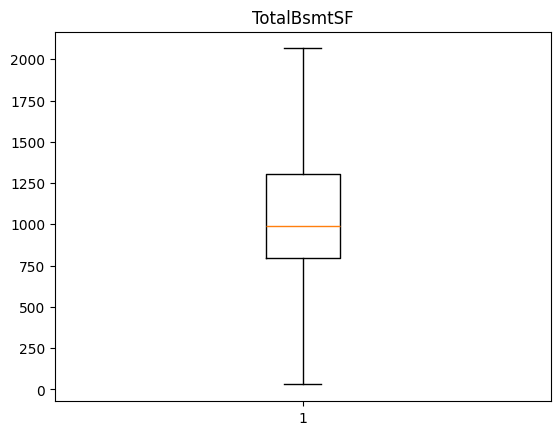

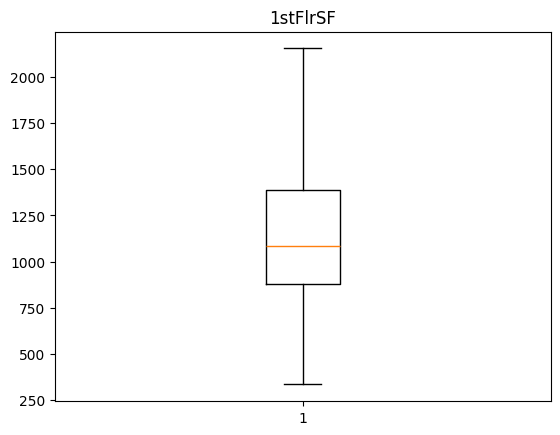

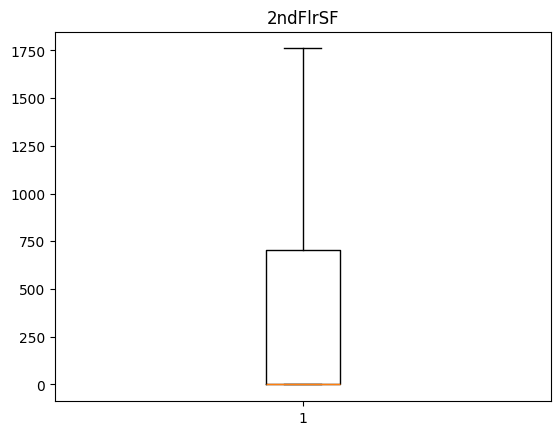

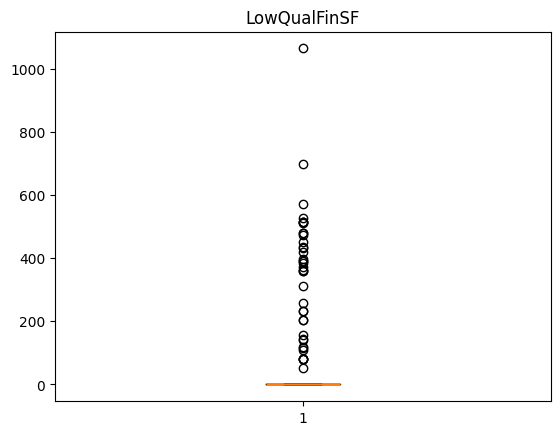

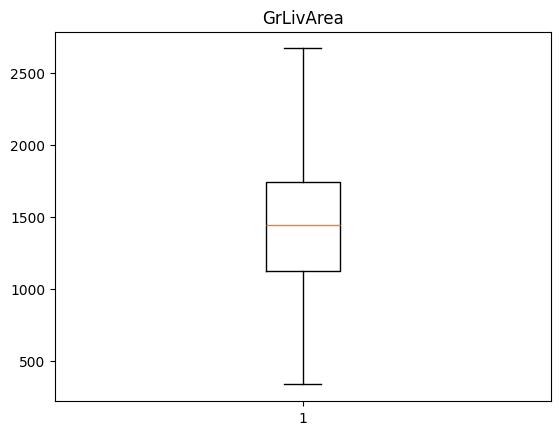

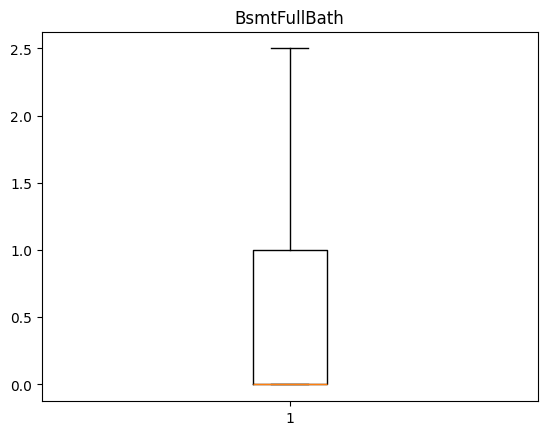

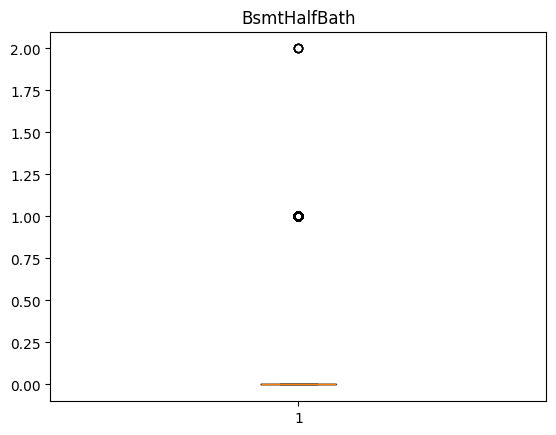

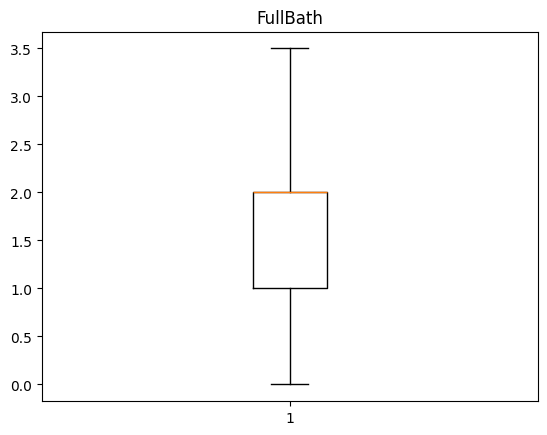

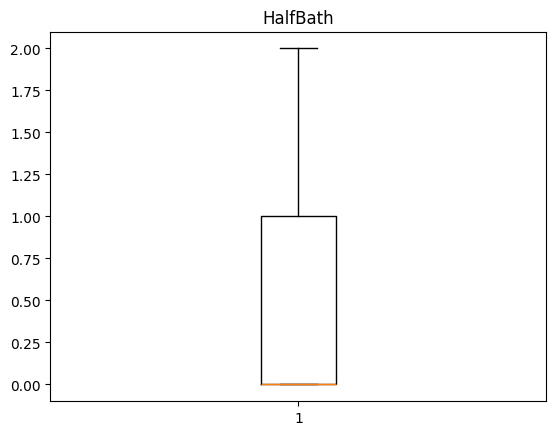

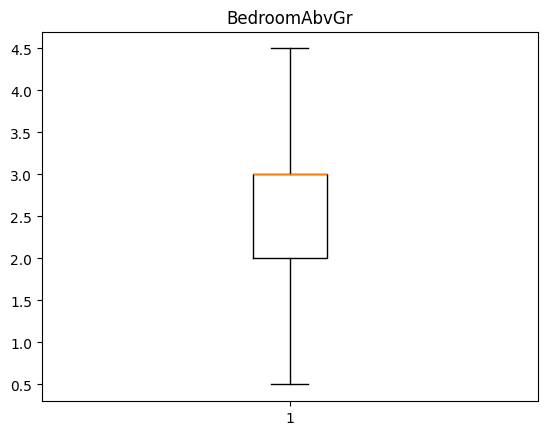

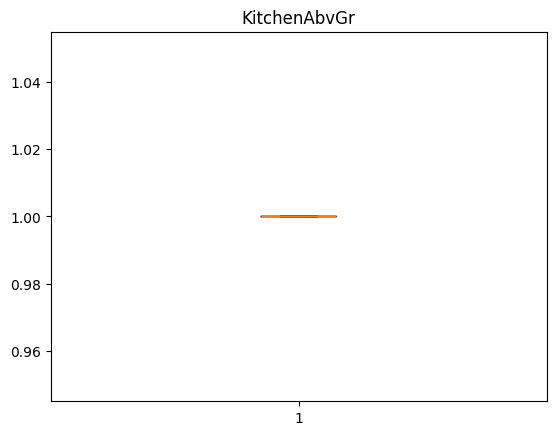

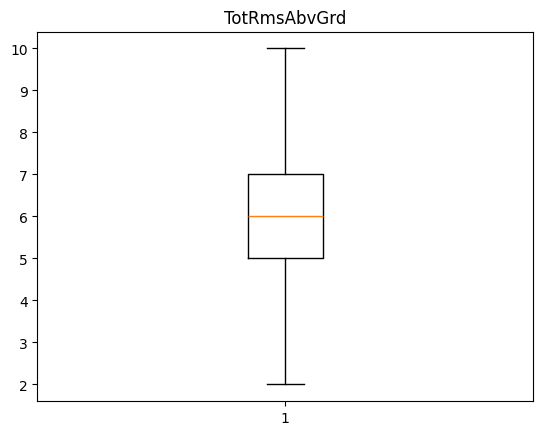

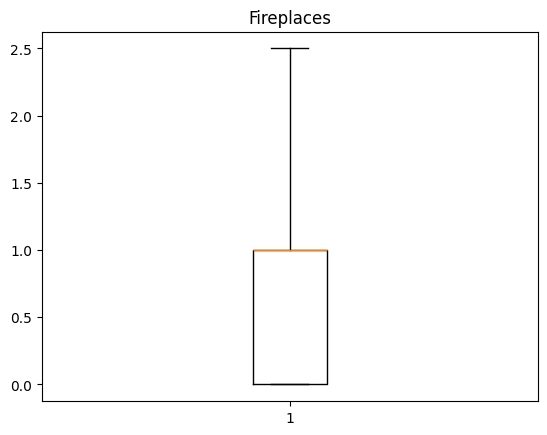

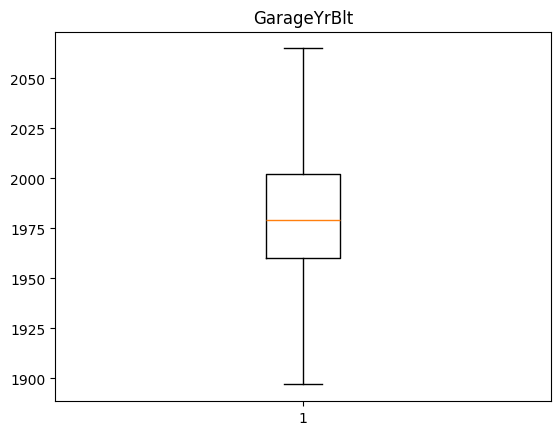

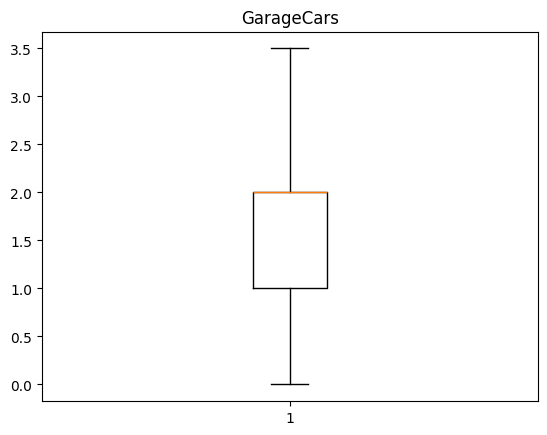

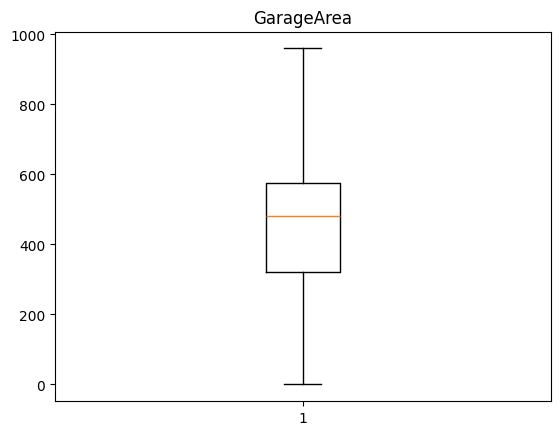

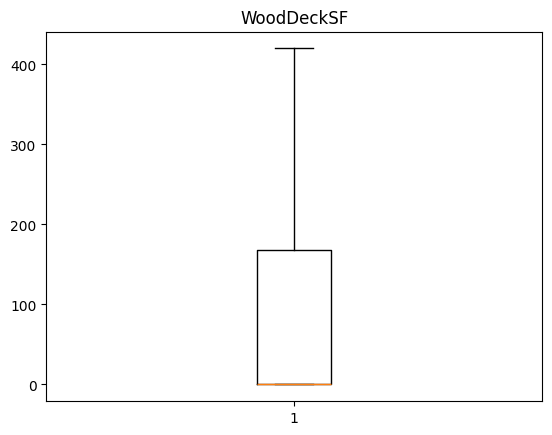

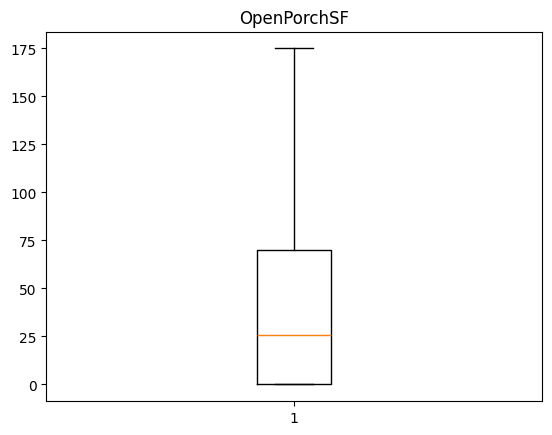

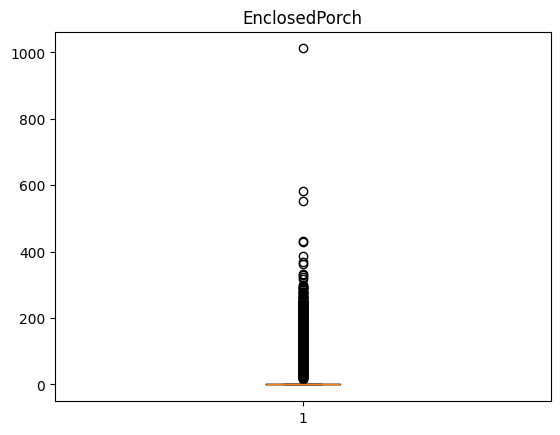

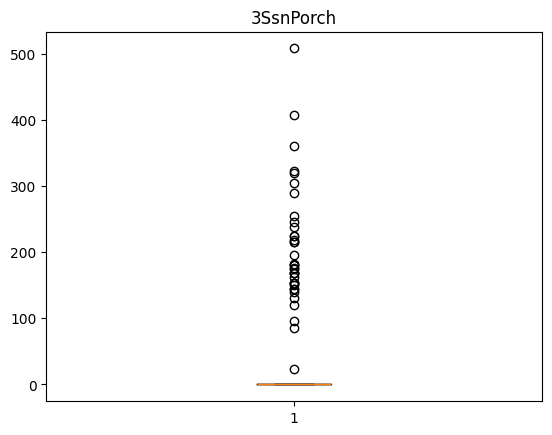

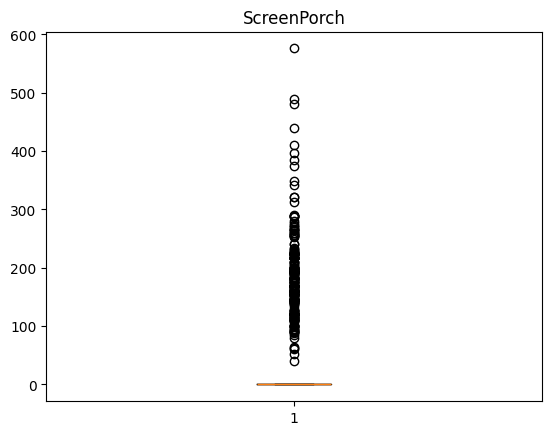

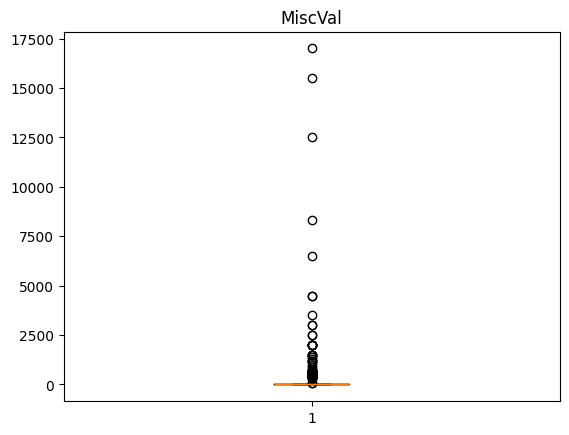

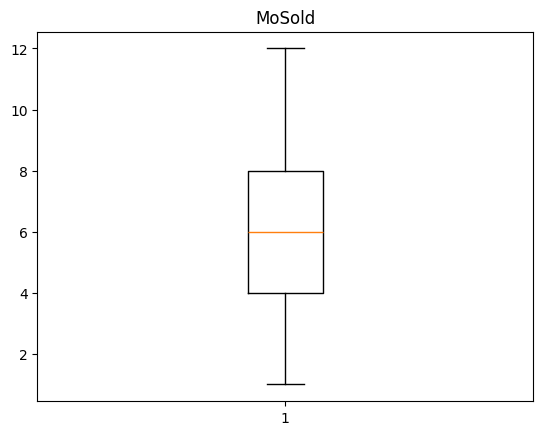

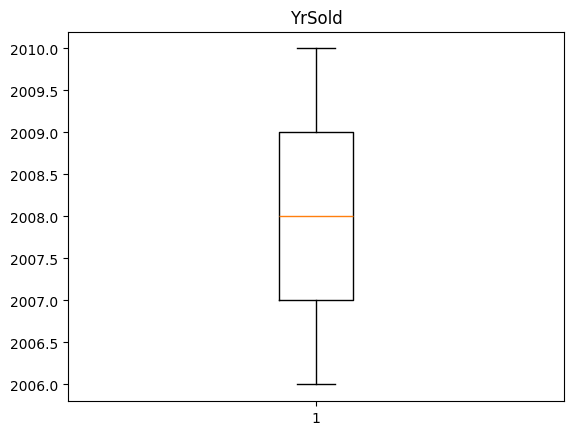

In [46]:
for i in df.select_dtypes([int,float]):
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [47]:
train = df[df["indent"]== "train"]

In [48]:
test12 = df[df["indent"]== "test"]

In [49]:
train.select_dtypes(object).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice',
       'indent'],
      dtype='object')

In [50]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,indent
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,train
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,train
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,train
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,272,0,0,0,2,2006,WD,Abnorml,140000,train
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,train
1456,20,RL,85.0,13175,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,train
1457,70,RL,66.0,9042,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,train
1458,20,RL,68.0,9717,Pave,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,4,2010,WD,Normal,142125,train


In [51]:
dff = pd.get_dummies(train,columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
       ],
                drop_first=True)
dff.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)

In [52]:
dff.drop(columns="indent",inplace=True)

In [53]:
X = dff.drop(columns="SalePrice")
y = dff["SalePrice"]

In [54]:
from  sklearn.linear_model import LinearRegression

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=55)

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
lr.score(X_train,y_train)

0.937211964208554